In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\hp\Documents\ML Lab Spring 25\1_Orignal_AEP_hourly.csv', parse_dates=['Datetime'], index_col='Datetime')

<Axes: >

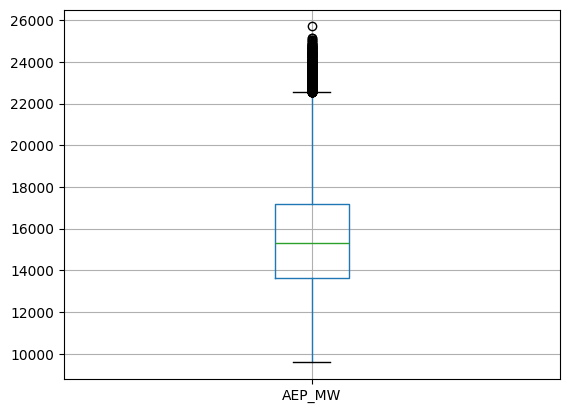

In [3]:
df.boxplot('AEP_MW')

In [4]:
def detect_outliers_iqr(data):
    outliers = []
    #data = sorted(data)
    q1 = data['AEP_MW'].quantile(0.25)
    q3 = data['AEP_MW'].quantile(0.75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    idx = 2
    idx_list = []
    for i in list(data['AEP_MW']): 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
            idx_list.append(idx)
        idx = idx + 1
    data.loc[data['AEP_MW'] < lwr_bound, 'AEP_MW'] = np.nan
    data.loc[data['AEP_MW'] > upr_bound, 'AEP_MW'] = np.nan
    return outliers, data, idx_list# Driver code

In [5]:
sample_outliers, p_data, index_of_out = detect_outliers_iqr(df)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [22577.0, 22573.0, 22909.0, 23371.0, 23243.0, 23276.0, 23082.0, 22605.0, 22671.0, 22717.0, 22725.0, 22610.0, 22836.0, 23325.0, 23435.0, 23614.0, 23418.0, 23092.0, 23089.0, 23359.0, 23479.0, 23308.0, 22985.0, 22766.0, 22658.0, 22922.0, 23470.0, 23860.0, 24015.0, 23708.0, 23543.0, 22910.0, 23022.0, 23558.0, 23741.0, 22942.0, 22791.0, 23013.0, 22970.0, 22728.0, 22579.0, 22558.0, 22652.0, 22639.0, 22940.0, 22886.0, 22894.0, 22920.0, 22566.0, 22986.0, 23369.0, 23426.0, 23271.0, 23266.0, 23975.0, 24413.0, 24602.0, 24741.0, 24811.0, 24842.0, 24538.0, 23963.0, 23504.0, 23403.0, 23271.0, 23975.0, 24435.0, 24711.0, 24642.0, 24712.0, 24632.0, 24316.0, 23750.0, 23176.0, 23364.0, 23458.0, 24020.0, 24342.0, 24270.0, 24311.0, 24273.0, 24113.0, 23649.0, 23158.0, 22971.0, 22958.0, 23299.0, 23476.0, 23156.0, 22779.0, 22808.0, 22922.0, 23008.0, 22597.0, 23194.0, 23650.0, 23845.0, 23970.0, 23865.0, 23458.0, 22983.0, 22825.0, 23189.0, 23335.0, 23093.0, 22676.0, 22706.0, 23221.0, 

In [6]:
pd.isnull(p_data['AEP_MW']).sum()

np.int64(667)

In [7]:
index_of_out

[274,
 2480,
 5605,
 5606,
 5607,
 5608,
 5609,
 5797,
 5798,
 5799,
 5800,
 5801,
 5821,
 5822,
 5823,
 5824,
 5825,
 5826,
 5846,
 5847,
 5848,
 5849,
 5850,
 5872,
 5873,
 6012,
 6013,
 6014,
 6015,
 6016,
 6017,
 6018,
 6036,
 6037,
 6038,
 6039,
 6134,
 6135,
 6136,
 6137,
 6711,
 6712,
 10398,
 10399,
 10542,
 10543,
 14483,
 14484,
 14485,
 14578,
 14579,
 14580,
 14581,
 14601,
 14602,
 14603,
 14604,
 14605,
 14606,
 14607,
 14608,
 14609,
 14610,
 14611,
 14625,
 14626,
 14627,
 14628,
 14629,
 14630,
 14631,
 14632,
 14633,
 14634,
 14635,
 14650,
 14651,
 14652,
 14653,
 14654,
 14655,
 14656,
 14657,
 14658,
 14659,
 14940,
 14941,
 14942,
 14943,
 14944,
 14964,
 14965,
 14966,
 14986,
 14987,
 14988,
 14989,
 14990,
 14991,
 14992,
 14993,
 22522,
 22523,
 22524,
 22525,
 22526,
 22546,
 22547,
 22548,
 22549,
 22550,
 22572,
 22573,
 22713,
 22714,
 22715,
 22716,
 22717,
 22718,
 22719,
 22720,
 22738,
 22739,
 22740,
 22741,
 22742,
 22832,
 22833,
 22834,
 22835,
 22

In [8]:
df['AEP_MW'].interpolate(method='time',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_7360\3789388383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AEP_MW'].interpolate(method='time',inplace=True)


In [9]:
pd.isnull(p_data['AEP_MW']).sum()

np.int64(0)

In [10]:
p_data.reset_index(inplace=True)

In [12]:
p_data.to_csv(r'C:\Users\hp\Documents\ML Lab Spring 25\1_Orignal_AEP_hourly.csv',index=False)